<a href="https://colab.research.google.com/github/mgmboyd/DataAnalytics-Project3/blob/master/2018_2020_Project_3_Team_7%20FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Analytics - Project 3 Team 7**

In [232]:
# LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import plotly.express as px
import seaborn as sns
sns.set()
!pip install sodapy

# **DATA CONNECTION**

In [233]:
df = pd.read_csv('https://raw.githubusercontent.com/mgmboyd/DataAnalytics-Project3/master/Harlem_covid_cases_project%20-%20V.4.csv')

In [234]:
df.shape

(839, 36)

In [235]:
df.columns

Index(['facility', 'admit_date', 'month', 'year', 'encounter_dept', 'dept_id',
       'encounter_type', 'encounter_type_id', 'collection_dept',
       'admit_status', 'admit_status_id', 'service', 'service_id', 'unit_room',
       'mrn', 'age', 'mortality_status', 'abnormality', 'abnormal',
       'component ', 'procedure', 'lab_id', 'infection_status', 'value',
       'specimen_type', 'collected_date', 'collected_time', 'isolation_status',
       'lab_status', 'result_date', 'result_time', 'discharge_date', 'gender',
       'zip_code', 'primary_problem', 'visit_count'],
      dtype='object')

In [236]:
df.head(1)

,facility,admit_date,month,year,encounter_dept,dept_id,encounter_type,encounter_type_id,collection_dept,admit_status,admit_status_id,service,service_id,unit_room,mrn,age,mortality_status,abnormality,abnormal,component,procedure,lab_id,infection_status,value,specimen_type,collected_date,collected_time,isolation_status,lab_status,result_date,result_time,discharge_date,gender,zip_code,primary_problem,visit_count
0,HARLEM HOSPITAL CENTER,12/22/2018,December,2018,HA IP 11SU,1012007020,Discharged,300,HA IP 11SU,No,0,Medicine,122,HA 11SU 11-111,1,83.0,Deceased,Abnormal,Abnormal,SCANNED REPORT\r\nCOVID-19 BIOREFERENCE LAB,BIOREFERENCE COVID-19 PCR(SO) [LABC1925],LABC1925,COVID-19 (confirmed),Positive,Nasopharyngeal,4/6/2020,1059,Not reported,Final result,4/15/2020,11:07:20 AM,4/10/2020,F,10026,Atrial flutter (HCC) (Additional Hospital Prob...,1


In [237]:
df.tail(1)

,facility,admit_date,month,year,encounter_dept,dept_id,encounter_type,encounter_type_id,collection_dept,admit_status,admit_status_id,service,service_id,unit_room,mrn,age,mortality_status,abnormality,abnormal,component,procedure,lab_id,infection_status,value,specimen_type,collected_date,collected_time,isolation_status,lab_status,result_date,result_time,discharge_date,gender,zip_code,primary_problem,visit_count
838,HARLEM HOSPITAL CENTER,3/15/2020,March,2020,HA ED ADULT,1012006030,ED Dismissed,800,HA ED ADULT,No,0,Emergency,123,HA EDADL,839,35.0,Not Deceased,Panic,Abnormal,NOVEL CORONAVIRUS (COVID-19),LABCORP COVID-19 TEST (SEND OUT) [LABC1923],LABC1923,COVID-19 (confirmed),Positive,NP/OP Swab,3/15/2020,1334,Not reported,Final result,3/18/2020,1:16:21 PM,3/15/2020,M,10031,None,1


In [238]:
df.columns

Index(['facility', 'admit_date', 'month', 'year', 'encounter_dept', 'dept_id',
       'encounter_type', 'encounter_type_id', 'collection_dept',
       'admit_status', 'admit_status_id', 'service', 'service_id', 'unit_room',
       'mrn', 'age', 'mortality_status', 'abnormality', 'abnormal',
       'component ', 'procedure', 'lab_id', 'infection_status', 'value',
       'specimen_type', 'collected_date', 'collected_time', 'isolation_status',
       'lab_status', 'result_date', 'result_time', 'discharge_date', 'gender',
       'zip_code', 'primary_problem', 'visit_count'],
      dtype='object')

In [239]:
df.dtypes

facility              object
admit_date            object
month                 object
year                   int64
encounter_dept        object
dept_id                int64
encounter_type        object
encounter_type_id      int64
collection_dept       object
admit_status          object
admit_status_id        int64
service               object
service_id             int64
unit_room             object
mrn                    int64
age                  float64
mortality_status      object
abnormality           object
abnormal              object
component             object
procedure             object
lab_id                object
infection_status      object
value                 object
specimen_type         object
collected_date        object
collected_time         int64
isolation_status      object
lab_status            object
result_date           object
result_time           object
discharge_date        object
gender                object
zip_code               int64
primary_proble

# **DATA WRANGLING**

In [240]:
# Drop columns
ha_df = df.drop(columns=['unit_room', 'mortality_status', 'abnormality', 'abnormal', 
                         'collection_dept','collected_time','result_time', 'lab_status'])
ha_df.head(3)

,facility,admit_date,month,year,encounter_dept,dept_id,encounter_type,encounter_type_id,admit_status,admit_status_id,service,service_id,mrn,age,component,procedure,lab_id,infection_status,value,specimen_type,collected_date,isolation_status,result_date,discharge_date,gender,zip_code,primary_problem,visit_count
0,HARLEM HOSPITAL CENTER,12/22/2018,December,2018,HA IP 11SU,1012007020,Discharged,300,No,0,Medicine,122,1,83.0,SCANNED REPORT\r\nCOVID-19 BIOREFERENCE LAB,BIOREFERENCE COVID-19 PCR(SO) [LABC1925],LABC1925,COVID-19 (confirmed),Positive,Nasopharyngeal,4/6/2020,Not reported,4/15/2020,4/10/2020,F,10026,Atrial flutter (HCC) (Additional Hospital Prob...,1
1,HARLEM HOSPITAL CENTER,11/13/2019,November,2019,HA IP 13MD,1012007040,Discharged,300,No,0,Medicine,122,2,81.0,SCANNED REPORT\r\nCOVID-19 BIOREFERENCE LAB,BIOREFERENCE COVID-19 PCR(SO) [LABC1925],LABC1925,COVID-19 (confirmed),Positive,Nasopharyngeal,3/23/2020,Not reported,3/30/2020,4/25/2020,M,10031,COVID-19 virus detected (Principal Hospital Pr...,1
2,HARLEM HOSPITAL CENTER,1/21/2020,January,2020,HA IP 13MD,1012007040,Discharged,300,No,0,Medicine,122,3,84.0,NOVEL CORONAVIRUS (COVID-19),LABCORP COVID-19 TEST (SEND OUT) [LABC1923],LABC1923,COVID-19 (confirmed),Positive,NP/OP Swab,3/19/2020,Not reported,3/26/2020,4/11/2020,F,10037,COVID-19 virus detected (Principal Hospital Pr...,1


In [241]:
# Adding column with total cases by admit date
ha_df['sum_cases'] = df.groupby('admit_date')['visit_count'].transform(np.sum)
ha_df.head(3)

,facility,admit_date,month,year,encounter_dept,dept_id,encounter_type,encounter_type_id,admit_status,admit_status_id,service,service_id,mrn,age,component,procedure,lab_id,infection_status,value,specimen_type,collected_date,isolation_status,result_date,discharge_date,gender,zip_code,primary_problem,visit_count,sum_cases
0,HARLEM HOSPITAL CENTER,12/22/2018,December,2018,HA IP 11SU,1012007020,Discharged,300,No,0,Medicine,122,1,83.0,SCANNED REPORT\r\nCOVID-19 BIOREFERENCE LAB,BIOREFERENCE COVID-19 PCR(SO) [LABC1925],LABC1925,COVID-19 (confirmed),Positive,Nasopharyngeal,4/6/2020,Not reported,4/15/2020,4/10/2020,F,10026,Atrial flutter (HCC) (Additional Hospital Prob...,1,1
1,HARLEM HOSPITAL CENTER,11/13/2019,November,2019,HA IP 13MD,1012007040,Discharged,300,No,0,Medicine,122,2,81.0,SCANNED REPORT\r\nCOVID-19 BIOREFERENCE LAB,BIOREFERENCE COVID-19 PCR(SO) [LABC1925],LABC1925,COVID-19 (confirmed),Positive,Nasopharyngeal,3/23/2020,Not reported,3/30/2020,4/25/2020,M,10031,COVID-19 virus detected (Principal Hospital Pr...,1,1
2,HARLEM HOSPITAL CENTER,1/21/2020,January,2020,HA IP 13MD,1012007040,Discharged,300,No,0,Medicine,122,3,84.0,NOVEL CORONAVIRUS (COVID-19),LABCORP COVID-19 TEST (SEND OUT) [LABC1923],LABC1923,COVID-19 (confirmed),Positive,NP/OP Swab,3/19/2020,Not reported,3/26/2020,4/11/2020,F,10037,COVID-19 virus detected (Principal Hospital Pr...,1,2


In [242]:
# Create column (month_id) with numerical value for months
ha_df['month_id'] = pd.DatetimeIndex(ha_df['admit_date']).month
ha_df.head(3)

,facility,admit_date,month,year,encounter_dept,dept_id,encounter_type,encounter_type_id,admit_status,admit_status_id,service,service_id,mrn,age,component,procedure,lab_id,infection_status,value,specimen_type,collected_date,isolation_status,result_date,discharge_date,gender,zip_code,primary_problem,visit_count,sum_cases,month_id
0,HARLEM HOSPITAL CENTER,12/22/2018,December,2018,HA IP 11SU,1012007020,Discharged,300,No,0,Medicine,122,1,83.0,SCANNED REPORT\r\nCOVID-19 BIOREFERENCE LAB,BIOREFERENCE COVID-19 PCR(SO) [LABC1925],LABC1925,COVID-19 (confirmed),Positive,Nasopharyngeal,4/6/2020,Not reported,4/15/2020,4/10/2020,F,10026,Atrial flutter (HCC) (Additional Hospital Prob...,1,1,12
1,HARLEM HOSPITAL CENTER,11/13/2019,November,2019,HA IP 13MD,1012007040,Discharged,300,No,0,Medicine,122,2,81.0,SCANNED REPORT\r\nCOVID-19 BIOREFERENCE LAB,BIOREFERENCE COVID-19 PCR(SO) [LABC1925],LABC1925,COVID-19 (confirmed),Positive,Nasopharyngeal,3/23/2020,Not reported,3/30/2020,4/25/2020,M,10031,COVID-19 virus detected (Principal Hospital Pr...,1,1,11
2,HARLEM HOSPITAL CENTER,1/21/2020,January,2020,HA IP 13MD,1012007040,Discharged,300,No,0,Medicine,122,3,84.0,NOVEL CORONAVIRUS (COVID-19),LABCORP COVID-19 TEST (SEND OUT) [LABC1923],LABC1923,COVID-19 (confirmed),Positive,NP/OP Swab,3/19/2020,Not reported,3/26/2020,4/11/2020,F,10037,COVID-19 virus detected (Principal Hospital Pr...,1,2,1


In [243]:
# Copying 'value' column
ha_df['value_id'] = ha_df['value']

In [244]:
# Changing string values to integers for plotting purposes
ha_df['value_id'].replace('Positive', 1, inplace=True)
ha_df['value_id'].replace('Inconclusive', 0, inplace=True)
ha_df.head(3)

,facility,admit_date,month,year,encounter_dept,dept_id,encounter_type,encounter_type_id,admit_status,admit_status_id,service,service_id,mrn,age,component,procedure,lab_id,infection_status,value,specimen_type,collected_date,isolation_status,result_date,discharge_date,gender,zip_code,primary_problem,visit_count,sum_cases,month_id,value_id
0,HARLEM HOSPITAL CENTER,12/22/2018,December,2018,HA IP 11SU,1012007020,Discharged,300,No,0,Medicine,122,1,83.0,SCANNED REPORT\r\nCOVID-19 BIOREFERENCE LAB,BIOREFERENCE COVID-19 PCR(SO) [LABC1925],LABC1925,COVID-19 (confirmed),Positive,Nasopharyngeal,4/6/2020,Not reported,4/15/2020,4/10/2020,F,10026,Atrial flutter (HCC) (Additional Hospital Prob...,1,1,12,1
1,HARLEM HOSPITAL CENTER,11/13/2019,November,2019,HA IP 13MD,1012007040,Discharged,300,No,0,Medicine,122,2,81.0,SCANNED REPORT\r\nCOVID-19 BIOREFERENCE LAB,BIOREFERENCE COVID-19 PCR(SO) [LABC1925],LABC1925,COVID-19 (confirmed),Positive,Nasopharyngeal,3/23/2020,Not reported,3/30/2020,4/25/2020,M,10031,COVID-19 virus detected (Principal Hospital Pr...,1,1,11,1
2,HARLEM HOSPITAL CENTER,1/21/2020,January,2020,HA IP 13MD,1012007040,Discharged,300,No,0,Medicine,122,3,84.0,NOVEL CORONAVIRUS (COVID-19),LABCORP COVID-19 TEST (SEND OUT) [LABC1923],LABC1923,COVID-19 (confirmed),Positive,NP/OP Swab,3/19/2020,Not reported,3/26/2020,4/11/2020,F,10037,COVID-19 virus detected (Principal Hospital Pr...,1,2,1,1


In [245]:
# Copying "gender" column
ha_df['gender_id'] = ha_df['gender']

In [246]:
# # Changing string values to integers for plotting purposes
ha_df['gender_id'].replace('F', 1, inplace=True)
ha_df['gender_id'].replace('M', 2, inplace=True)
ha_df.head(3)

,facility,admit_date,month,year,encounter_dept,dept_id,encounter_type,encounter_type_id,admit_status,admit_status_id,service,service_id,mrn,age,component,procedure,lab_id,infection_status,value,specimen_type,collected_date,isolation_status,result_date,discharge_date,gender,zip_code,primary_problem,visit_count,sum_cases,month_id,value_id,gender_id
0,HARLEM HOSPITAL CENTER,12/22/2018,December,2018,HA IP 11SU,1012007020,Discharged,300,No,0,Medicine,122,1,83.0,SCANNED REPORT\r\nCOVID-19 BIOREFERENCE LAB,BIOREFERENCE COVID-19 PCR(SO) [LABC1925],LABC1925,COVID-19 (confirmed),Positive,Nasopharyngeal,4/6/2020,Not reported,4/15/2020,4/10/2020,F,10026,Atrial flutter (HCC) (Additional Hospital Prob...,1,1,12,1,1
1,HARLEM HOSPITAL CENTER,11/13/2019,November,2019,HA IP 13MD,1012007040,Discharged,300,No,0,Medicine,122,2,81.0,SCANNED REPORT\r\nCOVID-19 BIOREFERENCE LAB,BIOREFERENCE COVID-19 PCR(SO) [LABC1925],LABC1925,COVID-19 (confirmed),Positive,Nasopharyngeal,3/23/2020,Not reported,3/30/2020,4/25/2020,M,10031,COVID-19 virus detected (Principal Hospital Pr...,1,1,11,1,2
2,HARLEM HOSPITAL CENTER,1/21/2020,January,2020,HA IP 13MD,1012007040,Discharged,300,No,0,Medicine,122,3,84.0,NOVEL CORONAVIRUS (COVID-19),LABCORP COVID-19 TEST (SEND OUT) [LABC1923],LABC1923,COVID-19 (confirmed),Positive,NP/OP Swab,3/19/2020,Not reported,3/26/2020,4/11/2020,F,10037,COVID-19 virus detected (Principal Hospital Pr...,1,2,1,1,1


In [247]:
# Change data type to date/time
ha_df['admit_date'] = pd.to_datetime(ha_df['admit_date'])

In [248]:
# Change data type to date/time
ha_df['discharge_date'] = pd.to_datetime(ha_df['discharge_date'])

In [249]:
# Change data type to date/time
ha_df['collected_date'] = pd.to_datetime(ha_df['collected_date'])

In [250]:
# Change data type to date/time
ha_df['result_date'] = pd.to_datetime(ha_df['result_date'])

In [251]:
pd.DatetimeIndex(ha_df['admit_date']).month

Int64Index([12, 11,  1,  1,  2,  2,  2,  3,  3,  3,
            ...
             7,  7,  7,  7,  7,  7,  8,  8,  8,  3],
           dtype='int64', name='admit_date', length=839)

In [252]:
# Check changes made
ha_df.dtypes

facility                     object
admit_date           datetime64[ns]
month                        object
year                          int64
encounter_dept               object
dept_id                       int64
encounter_type               object
encounter_type_id             int64
admit_status                 object
admit_status_id               int64
service                      object
service_id                    int64
mrn                           int64
age                         float64
component                    object
procedure                    object
lab_id                       object
infection_status             object
value                        object
specimen_type                object
collected_date       datetime64[ns]
isolation_status             object
result_date          datetime64[ns]
discharge_date       datetime64[ns]
gender                       object
zip_code                      int64
primary_problem              object
visit_count                 

In [253]:
# Sort columns in desired order
ha_df = ha_df[['facility', 'sum_cases', 'visit_count', 'mrn', 'age', 'gender', 'gender_id','zip_code', 'primary_problem', 
               'isolation_status', 'admit_status','admit_status_id', 'service', 
              'service_id', 'admit_date', 'month', 'month_id', 'year', 'discharge_date', 
               'encounter_dept', 'dept_id', 'encounter_type', 
              'encounter_type_id', 'component ', 'procedure', 'lab_id', 'infection_status', 'value', 'value_id', 
              'specimen_type', 'collected_date', 'result_date']]

In [254]:
cols = list(ha_df.columns.values)

In [255]:
# Checked sorted columns
ha_df.head(2)

,facility,sum_cases,visit_count,mrn,age,gender,gender_id,zip_code,primary_problem,isolation_status,admit_status,admit_status_id,service,service_id,admit_date,month,month_id,year,discharge_date,encounter_dept,dept_id,encounter_type,encounter_type_id,component,procedure,lab_id,infection_status,value,value_id,specimen_type,collected_date,result_date
0,HARLEM HOSPITAL CENTER,1,1,1,83.0,F,1,10026,Atrial flutter (HCC) (Additional Hospital Prob...,Not reported,No,0,Medicine,122,2018-12-22,December,12,2018,2020-04-10,HA IP 11SU,1012007020,Discharged,300,SCANNED REPORT\r\nCOVID-19 BIOREFERENCE LAB,BIOREFERENCE COVID-19 PCR(SO) [LABC1925],LABC1925,COVID-19 (confirmed),Positive,1,Nasopharyngeal,2020-04-06,2020-04-15
1,HARLEM HOSPITAL CENTER,1,1,2,81.0,M,2,10031,COVID-19 virus detected (Principal Hospital Pr...,Not reported,No,0,Medicine,122,2019-11-13,November,11,2019,2020-04-25,HA IP 13MD,1012007040,Discharged,300,SCANNED REPORT\r\nCOVID-19 BIOREFERENCE LAB,BIOREFERENCE COVID-19 PCR(SO) [LABC1925],LABC1925,COVID-19 (confirmed),Positive,1,Nasopharyngeal,2020-03-23,2020-03-30


In [256]:
# Data sorted by column "admit date"
ha_df.sort_values(['year','admit_date'], ascending=(True,True))
ha_df.head(3)

,facility,sum_cases,visit_count,mrn,age,gender,gender_id,zip_code,primary_problem,isolation_status,admit_status,admit_status_id,service,service_id,admit_date,month,month_id,year,discharge_date,encounter_dept,dept_id,encounter_type,encounter_type_id,component,procedure,lab_id,infection_status,value,value_id,specimen_type,collected_date,result_date
0,HARLEM HOSPITAL CENTER,1,1,1,83.0,F,1,10026,Atrial flutter (HCC) (Additional Hospital Prob...,Not reported,No,0,Medicine,122,2018-12-22,December,12,2018,2020-04-10,HA IP 11SU,1012007020,Discharged,300,SCANNED REPORT\r\nCOVID-19 BIOREFERENCE LAB,BIOREFERENCE COVID-19 PCR(SO) [LABC1925],LABC1925,COVID-19 (confirmed),Positive,1,Nasopharyngeal,2020-04-06,2020-04-15
1,HARLEM HOSPITAL CENTER,1,1,2,81.0,M,2,10031,COVID-19 virus detected (Principal Hospital Pr...,Not reported,No,0,Medicine,122,2019-11-13,November,11,2019,2020-04-25,HA IP 13MD,1012007040,Discharged,300,SCANNED REPORT\r\nCOVID-19 BIOREFERENCE LAB,BIOREFERENCE COVID-19 PCR(SO) [LABC1925],LABC1925,COVID-19 (confirmed),Positive,1,Nasopharyngeal,2020-03-23,2020-03-30
2,HARLEM HOSPITAL CENTER,2,1,3,84.0,F,1,10037,COVID-19 virus detected (Principal Hospital Pr...,Not reported,No,0,Medicine,122,2020-01-21,January,1,2020,2020-04-11,HA IP 13MD,1012007040,Discharged,300,NOVEL CORONAVIRUS (COVID-19),LABCORP COVID-19 TEST (SEND OUT) [LABC1923],LABC1923,COVID-19 (confirmed),Positive,1,NP/OP Swab,2020-03-19,2020-03-26


In [257]:
# Determining unique value for column "value"
ha_df['value'].unique()

array(['Positive', 'Inconclusive'], dtype=object)

In [258]:
# Determining unique values for column "specimen_type"
ha_df.specimen_type.unique()

array(['Nasopharyngeal', 'NP/OP Swab', 'Nasopharyngeal Swab',
       'Anterior Nares'], dtype=object)

In [259]:
# Determining unique value for column "primary_problem"
ha_df.primary_problem.unique()

array(['Atrial flutter (HCC) (Additional Hospital Problems)',
       'COVID-19 virus detected (Principal Hospital Problem)',
       'C1-C4 level spinal cord injury (HCC) (Principal Hospital Problem)',
       'Suspected Covid-19 Virus Infection (Principal Hospital Problem)',
       'None',
       'DM (diabetes mellitus) with complications (HCC) (Additional Hospital Problems)',
       'Lymphopenia, Tachycardia, Acute respiratory failure with hypoxia (HCC), Pneumonia of both lungs due to infectious organism, unspecified part of lung (Admission Diagnosis)',
       'Acute hypoxemic respiratory failure (HCC) (Principal Hospital Problem)',
       'Severe sepsis (HCC) (Additional Hospital Problems)',
       'Acute respiratory disease due to COVID-19 virus (Principal Hospital Problem)',
       'Acute respiratory failure with hypoxia (HCC) (Principal Hospital Problem)',
       'Cardiac arrest (HCC) (Additional Hospital Problems)',
       'Pneumonia of both lungs due to infectious organism, unspe

In [260]:
# Determining unique value for column "primary_problem"
ha_df.infection_status.unique()

array(['COVID-19 (confirmed)', 'Inconclusive'], dtype=object)

# **DATA ANALYSIS - Part 1**

In [261]:
# Determining length of stay (LOS) for positive patients in Harlem
ha_df['los'] = ha_df['discharge_date'] - ha_df['admit_date']
ha_df.head(3)

,facility,sum_cases,visit_count,mrn,age,gender,gender_id,zip_code,primary_problem,isolation_status,admit_status,admit_status_id,service,service_id,admit_date,month,month_id,year,discharge_date,encounter_dept,dept_id,encounter_type,encounter_type_id,component,procedure,lab_id,infection_status,value,value_id,specimen_type,collected_date,result_date,los
0,HARLEM HOSPITAL CENTER,1,1,1,83.0,F,1,10026,Atrial flutter (HCC) (Additional Hospital Prob...,Not reported,No,0,Medicine,122,2018-12-22,December,12,2018,2020-04-10,HA IP 11SU,1012007020,Discharged,300,SCANNED REPORT\r\nCOVID-19 BIOREFERENCE LAB,BIOREFERENCE COVID-19 PCR(SO) [LABC1925],LABC1925,COVID-19 (confirmed),Positive,1,Nasopharyngeal,2020-04-06,2020-04-15,475 days
1,HARLEM HOSPITAL CENTER,1,1,2,81.0,M,2,10031,COVID-19 virus detected (Principal Hospital Pr...,Not reported,No,0,Medicine,122,2019-11-13,November,11,2019,2020-04-25,HA IP 13MD,1012007040,Discharged,300,SCANNED REPORT\r\nCOVID-19 BIOREFERENCE LAB,BIOREFERENCE COVID-19 PCR(SO) [LABC1925],LABC1925,COVID-19 (confirmed),Positive,1,Nasopharyngeal,2020-03-23,2020-03-30,164 days
2,HARLEM HOSPITAL CENTER,2,1,3,84.0,F,1,10037,COVID-19 virus detected (Principal Hospital Pr...,Not reported,No,0,Medicine,122,2020-01-21,January,1,2020,2020-04-11,HA IP 13MD,1012007040,Discharged,300,NOVEL CORONAVIRUS (COVID-19),LABCORP COVID-19 TEST (SEND OUT) [LABC1923],LABC1923,COVID-19 (confirmed),Positive,1,NP/OP Swab,2020-03-19,2020-03-26,81 days


In [262]:
ha_df['los_num'] = ha_df.los.apply(lambda x: x.days)
ha_df.head(3)

,facility,sum_cases,visit_count,mrn,age,gender,gender_id,zip_code,primary_problem,isolation_status,admit_status,admit_status_id,service,service_id,admit_date,month,month_id,year,discharge_date,encounter_dept,dept_id,encounter_type,encounter_type_id,component,procedure,lab_id,infection_status,value,value_id,specimen_type,collected_date,result_date,los,los_num
0,HARLEM HOSPITAL CENTER,1,1,1,83.0,F,1,10026,Atrial flutter (HCC) (Additional Hospital Prob...,Not reported,No,0,Medicine,122,2018-12-22,December,12,2018,2020-04-10,HA IP 11SU,1012007020,Discharged,300,SCANNED REPORT\r\nCOVID-19 BIOREFERENCE LAB,BIOREFERENCE COVID-19 PCR(SO) [LABC1925],LABC1925,COVID-19 (confirmed),Positive,1,Nasopharyngeal,2020-04-06,2020-04-15,475 days,475.0
1,HARLEM HOSPITAL CENTER,1,1,2,81.0,M,2,10031,COVID-19 virus detected (Principal Hospital Pr...,Not reported,No,0,Medicine,122,2019-11-13,November,11,2019,2020-04-25,HA IP 13MD,1012007040,Discharged,300,SCANNED REPORT\r\nCOVID-19 BIOREFERENCE LAB,BIOREFERENCE COVID-19 PCR(SO) [LABC1925],LABC1925,COVID-19 (confirmed),Positive,1,Nasopharyngeal,2020-03-23,2020-03-30,164 days,164.0
2,HARLEM HOSPITAL CENTER,2,1,3,84.0,F,1,10037,COVID-19 virus detected (Principal Hospital Pr...,Not reported,No,0,Medicine,122,2020-01-21,January,1,2020,2020-04-11,HA IP 13MD,1012007040,Discharged,300,NOVEL CORONAVIRUS (COVID-19),LABCORP COVID-19 TEST (SEND OUT) [LABC1923],LABC1923,COVID-19 (confirmed),Positive,1,NP/OP Swab,2020-03-19,2020-03-26,81 days,81.0


In [263]:
ha_df_dis_df = ha_df[ha_df['los_num'].isnull()==False]
ha_df_dis_df.head(3)

,facility,sum_cases,visit_count,mrn,age,gender,gender_id,zip_code,primary_problem,isolation_status,admit_status,admit_status_id,service,service_id,admit_date,month,month_id,year,discharge_date,encounter_dept,dept_id,encounter_type,encounter_type_id,component,procedure,lab_id,infection_status,value,value_id,specimen_type,collected_date,result_date,los,los_num
0,HARLEM HOSPITAL CENTER,1,1,1,83.0,F,1,10026,Atrial flutter (HCC) (Additional Hospital Prob...,Not reported,No,0,Medicine,122,2018-12-22,December,12,2018,2020-04-10,HA IP 11SU,1012007020,Discharged,300,SCANNED REPORT\r\nCOVID-19 BIOREFERENCE LAB,BIOREFERENCE COVID-19 PCR(SO) [LABC1925],LABC1925,COVID-19 (confirmed),Positive,1,Nasopharyngeal,2020-04-06,2020-04-15,475 days,475.0
1,HARLEM HOSPITAL CENTER,1,1,2,81.0,M,2,10031,COVID-19 virus detected (Principal Hospital Pr...,Not reported,No,0,Medicine,122,2019-11-13,November,11,2019,2020-04-25,HA IP 13MD,1012007040,Discharged,300,SCANNED REPORT\r\nCOVID-19 BIOREFERENCE LAB,BIOREFERENCE COVID-19 PCR(SO) [LABC1925],LABC1925,COVID-19 (confirmed),Positive,1,Nasopharyngeal,2020-03-23,2020-03-30,164 days,164.0
2,HARLEM HOSPITAL CENTER,2,1,3,84.0,F,1,10037,COVID-19 virus detected (Principal Hospital Pr...,Not reported,No,0,Medicine,122,2020-01-21,January,1,2020,2020-04-11,HA IP 13MD,1012007040,Discharged,300,NOVEL CORONAVIRUS (COVID-19),LABCORP COVID-19 TEST (SEND OUT) [LABC1923],LABC1923,COVID-19 (confirmed),Positive,1,NP/OP Swab,2020-03-19,2020-03-26,81 days,81.0


In [264]:
ha_df_dis_df.los_num.dtype

dtype('float64')

In [265]:
ha_df_dis_df['los_num'] = ha_df_dis_df['los_num'].astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [266]:
ha_df_dis_df['los_num'] = ha_df_dis_df.los_num.apply(lambda x: x+1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [267]:
ha_df_dis_df.los_num.dtype

dtype('int64')

In [268]:
ha_df_dis_df.tail(3)

,facility,sum_cases,visit_count,mrn,age,gender,gender_id,zip_code,primary_problem,isolation_status,admit_status,admit_status_id,service,service_id,admit_date,month,month_id,year,discharge_date,encounter_dept,dept_id,encounter_type,encounter_type_id,component,procedure,lab_id,infection_status,value,value_id,specimen_type,collected_date,result_date,los,los_num
834,HARLEM HOSPITAL CENTER,1,1,835,19.0,F,1,10027,None,Not reported,No,0,Emergency,123,2020-07-29,July,7,2020,2020-07-29,HA ED PEDIATRIC,1012006020,ED Discharged,200,COVID-19 BIOREFERENCE LAB,BIOREFERENCE COVID-19 PCR(SO) [LABC1925],LABC1925,COVID-19 (confirmed),Positive,1,Nasopharyngeal,2020-07-29,2020-08-02,0 days,1
836,HARLEM HOSPITAL CENTER,1,1,837,55.0,F,1,10030,Lactic acidosis (Additional Hospital Problems),Contact and Droplet,No,0,Medicine,122,2020-08-03,August,8,2020,2020-08-04,HA ED ADULT,1012006030,Discharged,300,SARS-COV 2 PCR,CEPHEID COVID-19 PCR [LABC1930],LABC1930,COVID-19 (confirmed),Positive,1,Nasopharyngeal Swab,2020-08-03,2020-08-03,1 days,2
838,HARLEM HOSPITAL CENTER,4,1,839,35.0,M,2,10031,None,Not reported,No,0,Emergency,123,2020-03-15,March,3,2020,2020-03-15,HA ED ADULT,1012006030,ED Dismissed,800,NOVEL CORONAVIRUS (COVID-19),LABCORP COVID-19 TEST (SEND OUT) [LABC1923],LABC1923,COVID-19 (confirmed),Positive,1,NP/OP Swab,2020-03-15,2020-03-18,0 days,1


In [269]:
# Determining lab result turnaround time (collected_date - result_date)
ha_df['lab_time'] = ha_df['result_date'] - ha_df['collected_date']
ha_df.head(3)

,facility,sum_cases,visit_count,mrn,age,gender,gender_id,zip_code,primary_problem,isolation_status,admit_status,admit_status_id,service,service_id,admit_date,month,month_id,year,discharge_date,encounter_dept,dept_id,encounter_type,encounter_type_id,component,procedure,lab_id,infection_status,value,value_id,specimen_type,collected_date,result_date,los,los_num,lab_time
0,HARLEM HOSPITAL CENTER,1,1,1,83.0,F,1,10026,Atrial flutter (HCC) (Additional Hospital Prob...,Not reported,No,0,Medicine,122,2018-12-22,December,12,2018,2020-04-10,HA IP 11SU,1012007020,Discharged,300,SCANNED REPORT\r\nCOVID-19 BIOREFERENCE LAB,BIOREFERENCE COVID-19 PCR(SO) [LABC1925],LABC1925,COVID-19 (confirmed),Positive,1,Nasopharyngeal,2020-04-06,2020-04-15,475 days,475.0,9 days
1,HARLEM HOSPITAL CENTER,1,1,2,81.0,M,2,10031,COVID-19 virus detected (Principal Hospital Pr...,Not reported,No,0,Medicine,122,2019-11-13,November,11,2019,2020-04-25,HA IP 13MD,1012007040,Discharged,300,SCANNED REPORT\r\nCOVID-19 BIOREFERENCE LAB,BIOREFERENCE COVID-19 PCR(SO) [LABC1925],LABC1925,COVID-19 (confirmed),Positive,1,Nasopharyngeal,2020-03-23,2020-03-30,164 days,164.0,7 days
2,HARLEM HOSPITAL CENTER,2,1,3,84.0,F,1,10037,COVID-19 virus detected (Principal Hospital Pr...,Not reported,No,0,Medicine,122,2020-01-21,January,1,2020,2020-04-11,HA IP 13MD,1012007040,Discharged,300,NOVEL CORONAVIRUS (COVID-19),LABCORP COVID-19 TEST (SEND OUT) [LABC1923],LABC1923,COVID-19 (confirmed),Positive,1,NP/OP Swab,2020-03-19,2020-03-26,81 days,81.0,7 days


In [270]:
ha_df['lab_time_num'] = ha_df.lab_time.apply(lambda x: x.days)
ha_df.head(3)

,facility,sum_cases,visit_count,mrn,age,gender,gender_id,zip_code,primary_problem,isolation_status,admit_status,admit_status_id,service,service_id,admit_date,month,month_id,year,discharge_date,encounter_dept,dept_id,encounter_type,encounter_type_id,component,procedure,lab_id,infection_status,value,value_id,specimen_type,collected_date,result_date,los,los_num,lab_time,lab_time_num
0,HARLEM HOSPITAL CENTER,1,1,1,83.0,F,1,10026,Atrial flutter (HCC) (Additional Hospital Prob...,Not reported,No,0,Medicine,122,2018-12-22,December,12,2018,2020-04-10,HA IP 11SU,1012007020,Discharged,300,SCANNED REPORT\r\nCOVID-19 BIOREFERENCE LAB,BIOREFERENCE COVID-19 PCR(SO) [LABC1925],LABC1925,COVID-19 (confirmed),Positive,1,Nasopharyngeal,2020-04-06,2020-04-15,475 days,475.0,9 days,9
1,HARLEM HOSPITAL CENTER,1,1,2,81.0,M,2,10031,COVID-19 virus detected (Principal Hospital Pr...,Not reported,No,0,Medicine,122,2019-11-13,November,11,2019,2020-04-25,HA IP 13MD,1012007040,Discharged,300,SCANNED REPORT\r\nCOVID-19 BIOREFERENCE LAB,BIOREFERENCE COVID-19 PCR(SO) [LABC1925],LABC1925,COVID-19 (confirmed),Positive,1,Nasopharyngeal,2020-03-23,2020-03-30,164 days,164.0,7 days,7
2,HARLEM HOSPITAL CENTER,2,1,3,84.0,F,1,10037,COVID-19 virus detected (Principal Hospital Pr...,Not reported,No,0,Medicine,122,2020-01-21,January,1,2020,2020-04-11,HA IP 13MD,1012007040,Discharged,300,NOVEL CORONAVIRUS (COVID-19),LABCORP COVID-19 TEST (SEND OUT) [LABC1923],LABC1923,COVID-19 (confirmed),Positive,1,NP/OP Swab,2020-03-19,2020-03-26,81 days,81.0,7 days,7


In [271]:
ha_df_lab_df = ha_df[ha_df['lab_time_num'].isnull()==False]
ha_df_lab_df.head(3)

,facility,sum_cases,visit_count,mrn,age,gender,gender_id,zip_code,primary_problem,isolation_status,admit_status,admit_status_id,service,service_id,admit_date,month,month_id,year,discharge_date,encounter_dept,dept_id,encounter_type,encounter_type_id,component,procedure,lab_id,infection_status,value,value_id,specimen_type,collected_date,result_date,los,los_num,lab_time,lab_time_num
0,HARLEM HOSPITAL CENTER,1,1,1,83.0,F,1,10026,Atrial flutter (HCC) (Additional Hospital Prob...,Not reported,No,0,Medicine,122,2018-12-22,December,12,2018,2020-04-10,HA IP 11SU,1012007020,Discharged,300,SCANNED REPORT\r\nCOVID-19 BIOREFERENCE LAB,BIOREFERENCE COVID-19 PCR(SO) [LABC1925],LABC1925,COVID-19 (confirmed),Positive,1,Nasopharyngeal,2020-04-06,2020-04-15,475 days,475.0,9 days,9
1,HARLEM HOSPITAL CENTER,1,1,2,81.0,M,2,10031,COVID-19 virus detected (Principal Hospital Pr...,Not reported,No,0,Medicine,122,2019-11-13,November,11,2019,2020-04-25,HA IP 13MD,1012007040,Discharged,300,SCANNED REPORT\r\nCOVID-19 BIOREFERENCE LAB,BIOREFERENCE COVID-19 PCR(SO) [LABC1925],LABC1925,COVID-19 (confirmed),Positive,1,Nasopharyngeal,2020-03-23,2020-03-30,164 days,164.0,7 days,7
2,HARLEM HOSPITAL CENTER,2,1,3,84.0,F,1,10037,COVID-19 virus detected (Principal Hospital Pr...,Not reported,No,0,Medicine,122,2020-01-21,January,1,2020,2020-04-11,HA IP 13MD,1012007040,Discharged,300,NOVEL CORONAVIRUS (COVID-19),LABCORP COVID-19 TEST (SEND OUT) [LABC1923],LABC1923,COVID-19 (confirmed),Positive,1,NP/OP Swab,2020-03-19,2020-03-26,81 days,81.0,7 days,7


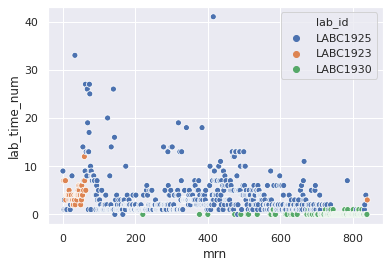

In [272]:
ax = sns.scatterplot(x="mrn", y="lab_time_num", hue="lab_id",data=ha_df_lab_df)

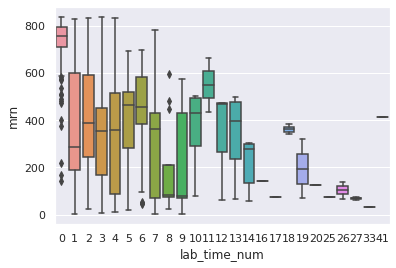

In [273]:
ax = sns.boxplot(x="lab_time_num", y="mrn", data=ha_df_lab_df)

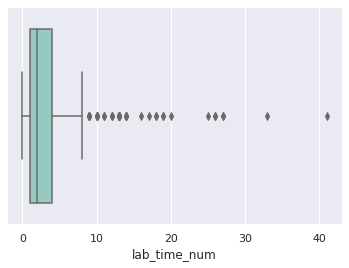

In [274]:
ax = sns.boxplot(x="lab_time_num",palette="Set3",data=ha_df_lab_df)

In [275]:
ha_df_lab_df.lab_time_num.dtype

dtype('int64')

In [276]:
ha_df_lab_df['lab_time_num'] = ha_df_lab_df['lab_time_num'].astype(int)

In [277]:
ha_df_lab_df['lab_time_num'] = ha_df_lab_df.lab_time_num.apply(lambda x: x+1)

In [278]:
ha_df_lab_df.lab_time_num.dtype

dtype('int64')

In [279]:
ha_df_lab_df.tail(3)

,facility,sum_cases,visit_count,mrn,age,gender,gender_id,zip_code,primary_problem,isolation_status,admit_status,admit_status_id,service,service_id,admit_date,month,month_id,year,discharge_date,encounter_dept,dept_id,encounter_type,encounter_type_id,component,procedure,lab_id,infection_status,value,value_id,specimen_type,collected_date,result_date,los,los_num,lab_time,lab_time_num
836,HARLEM HOSPITAL CENTER,1,1,837,55.0,F,1,10030,Lactic acidosis (Additional Hospital Problems),Contact and Droplet,No,0,Medicine,122,2020-08-03,August,8,2020,2020-08-04,HA ED ADULT,1012006030,Discharged,300,SARS-COV 2 PCR,CEPHEID COVID-19 PCR [LABC1930],LABC1930,COVID-19 (confirmed),Positive,1,Nasopharyngeal Swab,2020-08-03,2020-08-03,1 days,1.0,0 days,1
837,HARLEM HOSPITAL CENTER,1,1,838,30.0,M,2,10029,Lung abnormality,Contact and Airborne,Yes,1,Medicine,122,2020-08-07,August,8,2020,NaT,HA ED ADULT,1012006030,Admitted,100,SARS-COV 2 PCR,CEPHEID COVID-19 PCR [LABC1930],LABC1930,COVID-19 (confirmed),Positive,1,Nasopharyngeal Swab,2020-08-07,2020-08-07,NaT,NaN,0 days,1
838,HARLEM HOSPITAL CENTER,4,1,839,35.0,M,2,10031,None,Not reported,No,0,Emergency,123,2020-03-15,March,3,2020,2020-03-15,HA ED ADULT,1012006030,ED Dismissed,800,NOVEL CORONAVIRUS (COVID-19),LABCORP COVID-19 TEST (SEND OUT) [LABC1923],LABC1923,COVID-19 (confirmed),Positive,1,NP/OP Swab,2020-03-15,2020-03-18,0 days,0.0,3 days,4


In [280]:
# Deteriming number of positive patients by date
ha_df.pivot_table(index='admit_date',values='visit_count',aggfunc='count')

,visit_count
admit_date,
2018-12-22,1
2019-11-13,1
2020-01-21,2
2020-02-13,1
2020-02-26,2
...,...
2020-07-27,1
2020-07-29,1
2020-08-02,1


In [281]:
# Sort columns in desired order
ha_df = ha_df[['facility', 'sum_cases', 'visit_count', 'mrn', 'age', 'gender', 'gender_id','zip_code', 'primary_problem', 'isolation_status', 'admit_status','admit_status_id', 'service', 
              'service_id', 'admit_date', 'month', 'month_id', 'year', 'discharge_date', 'los', 'los_num', 'encounter_dept', 'dept_id', 'encounter_type', 
              'encounter_type_id', 'component ', 'procedure', 'lab_id', 'infection_status', 'value', 'value_id', 
              'specimen_type', 'collected_date', 'result_date']]
ha_df.head(3)

,facility,sum_cases,visit_count,mrn,age,gender,gender_id,zip_code,primary_problem,isolation_status,admit_status,admit_status_id,service,service_id,admit_date,month,month_id,year,discharge_date,los,los_num,encounter_dept,dept_id,encounter_type,encounter_type_id,component,procedure,lab_id,infection_status,value,value_id,specimen_type,collected_date,result_date
0,HARLEM HOSPITAL CENTER,1,1,1,83.0,F,1,10026,Atrial flutter (HCC) (Additional Hospital Prob...,Not reported,No,0,Medicine,122,2018-12-22,December,12,2018,2020-04-10,475 days,475.0,HA IP 11SU,1012007020,Discharged,300,SCANNED REPORT\r\nCOVID-19 BIOREFERENCE LAB,BIOREFERENCE COVID-19 PCR(SO) [LABC1925],LABC1925,COVID-19 (confirmed),Positive,1,Nasopharyngeal,2020-04-06,2020-04-15
1,HARLEM HOSPITAL CENTER,1,1,2,81.0,M,2,10031,COVID-19 virus detected (Principal Hospital Pr...,Not reported,No,0,Medicine,122,2019-11-13,November,11,2019,2020-04-25,164 days,164.0,HA IP 13MD,1012007040,Discharged,300,SCANNED REPORT\r\nCOVID-19 BIOREFERENCE LAB,BIOREFERENCE COVID-19 PCR(SO) [LABC1925],LABC1925,COVID-19 (confirmed),Positive,1,Nasopharyngeal,2020-03-23,2020-03-30
2,HARLEM HOSPITAL CENTER,2,1,3,84.0,F,1,10037,COVID-19 virus detected (Principal Hospital Pr...,Not reported,No,0,Medicine,122,2020-01-21,January,1,2020,2020-04-11,81 days,81.0,HA IP 13MD,1012007040,Discharged,300,NOVEL CORONAVIRUS (COVID-19),LABCORP COVID-19 TEST (SEND OUT) [LABC1923],LABC1923,COVID-19 (confirmed),Positive,1,NP/OP Swab,2020-03-19,2020-03-26


In [282]:
# Determining sum total of column 'visit_count'
ha_df['visit_count'].sum()

839

In [283]:
# Data is sorted by 'gender' column to analyze how many patients were male or female
ha_df.pivot_table(index='gender',values='visit_count',aggfunc='count')

,visit_count
gender,
F,360
M,479


In [284]:
# Data is sorted by Specimen type taken from each patient
ha_df.pivot_table(index='specimen_type',values='visit_count',aggfunc='count')

,visit_count
specimen_type,
Anterior Nares,1
NP/OP Swab,36
Nasopharyngeal,655
Nasopharyngeal Swab,147


In [285]:
# Determining number of patients using column 'visit_count' by 'encounter_dept' column
ha_df.pivot_table(index='encounter_dept',values='visit_count',aggfunc='count')

,visit_count
encounter_dept,
HA ED ADULT,634
HA ED PEDIATRIC,11
HA ED PSYCH,2
HA INTRA-OP,3
HA IP 11SU,24
HA IP 12MD,16
HA IP 13MD,46
HA IP 14MD,29
HA IP 15CC,5


In [286]:
# Number of positive cases per month
ha_df.groupby('month_id')['visit_count'].sum()

month_id
1       2
2       3
3     263
4     441
5      73
6      36
7      16
8       3
11      1
12      1
Name: visit_count, dtype: int64

In [287]:
# Data is sorted by 'gender_id' column to analyze how many patients were male or female
ha_df1 = ha_df.groupby('gender_id')['visit_count'].sum()
print(ha_df1)

gender_id
1    360
2    479
Name: visit_count, dtype: int64


In [288]:
# Determining number of positive patients by age
ha_df.pivot_table(index='age',values='visit_count',aggfunc='count')

,visit_count
age,
0.92,1
1.17,1
9.00,2
14.00,1
17.00,1
...,...
93.00,5
94.00,9
95.00,4


In [289]:
# Determining the mean of 'age' column
ha_df['age'].mean()

63.16578069129916

In [290]:
# What is the standard deviation by "age"
ha_df['age'].std()

17.69028213953049

In [291]:
# what is the age of the oldest patient that tested positive in Harlem to date
ha_df['age'].max()

97.0

In [292]:
# what is the age of the youngest patient that tested positive in Harlem to date
ha_df['age'].min()

0.92

In [293]:
# How many positive patients have primary problems at the time they were admitted?
ha_df.pivot_table(index='primary_problem',values='visit_count',aggfunc='count')

,visit_count
primary_problem,
2019 novel coronavirus detected (Principal Hospital Problem),1
2019 novel coronavirus disease (COVID-19) (Principal Hospital Problem),2
40 weeks gestation of pregnancy (Additional Hospital Problems),1
?COPD/Asthma,1
A-fib (HCC) (Additional Hospital Problems),1
...,...
Unsteady gait,1
Upper respiratory tract infection (Additional Hospital Problems),1
Viral pneumonia (Additional Hospital Problems),2


In [294]:
# Total number of cases by admission date
total_cases = ha_df.groupby('admit_date').sum()['sum_cases']
total_cases.head(3)

admit_date
2018-12-22    1
2019-11-13    1
2020-01-21    4
Name: sum_cases, dtype: int64

# **DATA ANALYSIS - Part 2**

### *Setting up Data Frames for EDA*

In [295]:
ha_df.dtypes

facility                      object
sum_cases                      int64
visit_count                    int64
mrn                            int64
age                          float64
gender                        object
gender_id                      int64
zip_code                       int64
primary_problem               object
isolation_status              object
admit_status                  object
admit_status_id                int64
service                       object
service_id                     int64
admit_date            datetime64[ns]
month                         object
month_id                       int64
year                           int64
discharge_date        datetime64[ns]
los                  timedelta64[ns]
los_num                      float64
encounter_dept                object
dept_id                        int64
encounter_type                object
encounter_type_id              int64
component                     object
procedure                     object
l

In [296]:
ha_cases = ha_df['sum_cases']
ha_dates = ha_df['month_id']
ha_age = ha_df['age']
ha_gender = ha_df['gender']
ha_genderid = ha_df['gender_id']
ha_visitcount = ha_df['visit_count']
ha_month = ha_df['month_id']
ha_losnum = ha_df['los_num']
ha_zip = ha_df['zip_code']
ha_encid = ha_df['encounter_type_id']
ha_deptid = ha_df['dept_id']
ha_svcid = ha_df['service_id']
ha_value = ha_df['value_id']

### *Exploratory Data Analysis - Scatter Plots*

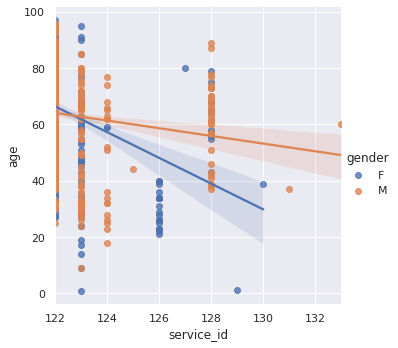

In [297]:
# Regression Analysis showing corelation between age, gender and patient service department:
sns.lmplot(data=ha_df, x='service_id', y='age', hue='gender')

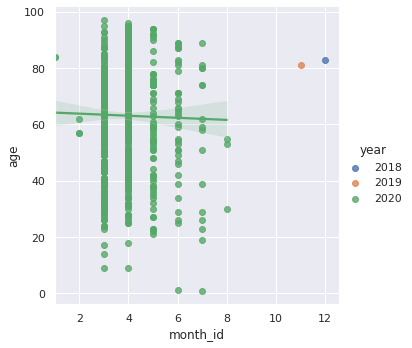

In [298]:
# Regression Analysis showing corelation between age, month, and year:
sns.lmplot(data=ha_df, x='month_id', y='age', hue='year')

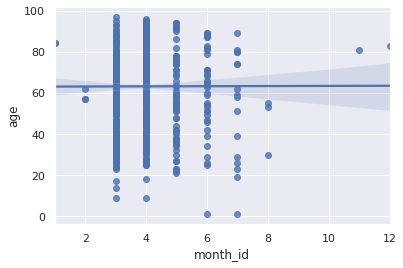

In [299]:
# Regression Analysis showing corelation between age and month:
sns.regplot(x='month_id',y='age', data=ha_df)

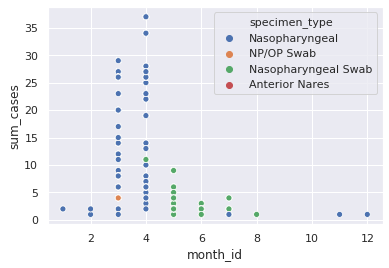

In [300]:
ax = sns.scatterplot(x="month_id", y="sum_cases",hue="specimen_type",data=ha_df)

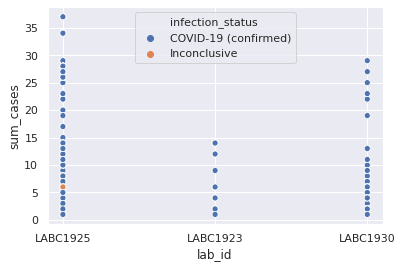

In [301]:
ax = sns.scatterplot(x="lab_id", y="sum_cases", hue="infection_status",
                     data=ha_df)

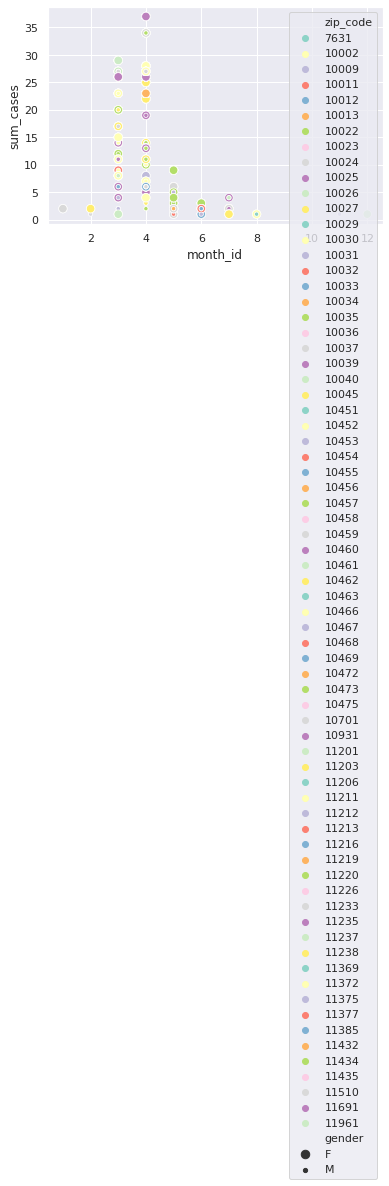

In [302]:
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x="month_id", y="sum_cases", hue="zip_code", size="gender",
                     palette="Set3",
                     data=ha_df)

### *Exploratory Data Analysis - Box Plots*




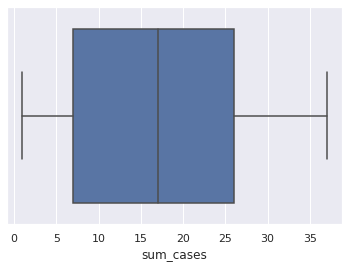

In [303]:
ax = sns.boxplot(x=ha_df["sum_cases"])

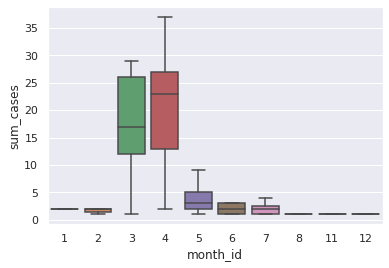

In [304]:
ax = sns.boxplot(x="month_id", y="sum_cases", data=ha_df)

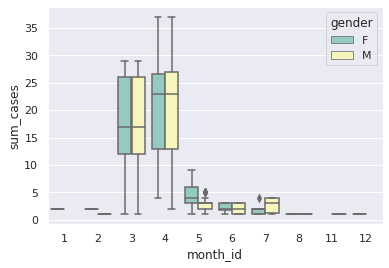

In [305]:
ax = sns.boxplot(x="month_id", y="sum_cases", hue="gender", data=ha_df, palette="Set3")

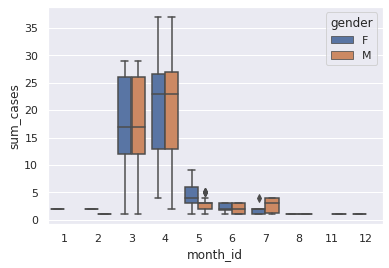

In [306]:
ax = sns.boxplot(x="month_id", y="sum_cases", hue="gender", data=ha_df)

### *Exploratory Data Analysis - Joint Plots*

In [307]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()

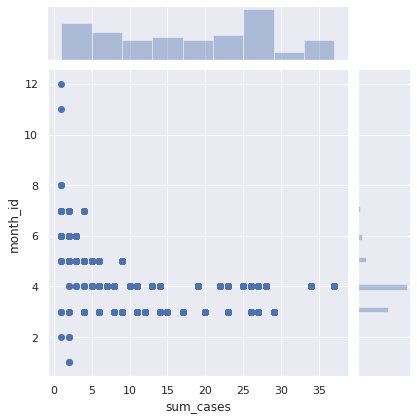

In [308]:
ax = sns.jointplot(x="sum_cases", y="month_id", data=ha_df)

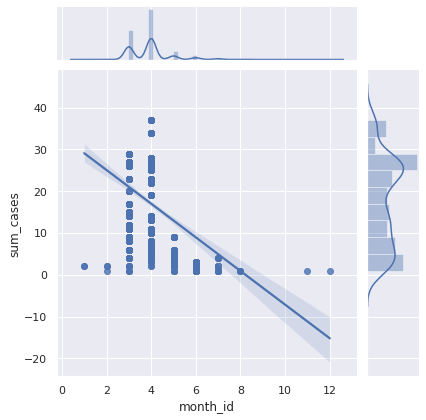

In [309]:
ax = sns.jointplot("month_id","sum_cases", data=ha_df, kind="reg")

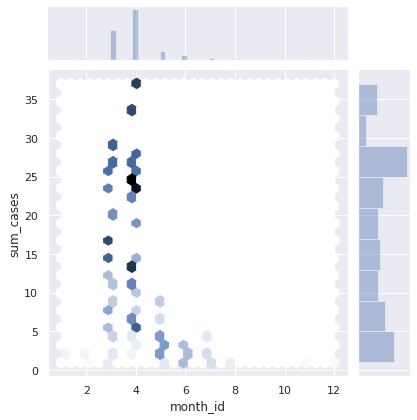

In [310]:
ax = sns.jointplot("month_id","sum_cases", data=ha_df, kind="hex")

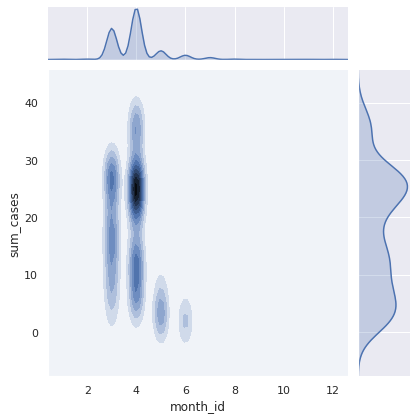

In [311]:
ax = sns.jointplot("month_id","sum_cases", data=ha_df, kind="kde")

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/_kernel_base.py:516: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1483: UserWarning:


/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1484: UserWarning:


/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1132: RuntimeWarning:

invalid value encountered in less

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1134: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1163: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.6/dist-packages/matplotl

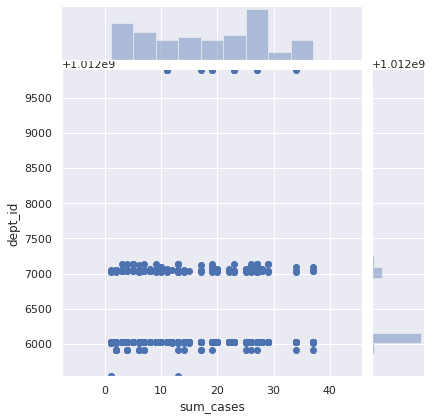

In [312]:
ax = (sns.jointplot("sum_cases","dept_id", data=ha_df).plot_joint(sns.kdeplot,n_levels=6))

### *Exploratory Data Analysis - Bar Plots 1*

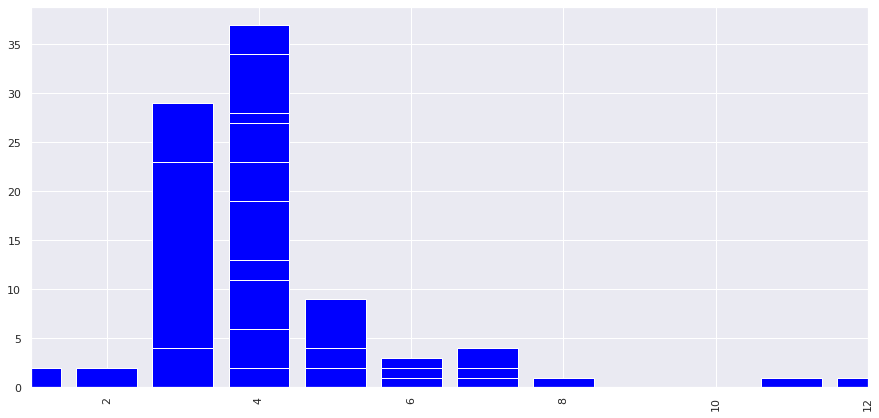

In [313]:
plt.figure(figsize=(15,7))
plt.bar(x=ha_dates, height=ha_cases, color='blue')
plt.xticks(rotation=90)
plt.xlim(1,12)
plt.show()

### *Exploratory Data Analysis - Bar Plots 2*

In [314]:
pt_data_discharge = ha_df_dis_df.los_num.value_counts()

In [315]:
type(pt_data_discharge)

pandas.core.series.Series

In [316]:
pt_discharge_df = pd.DataFrame(pt_data_discharge)
pt_discharge_df.head()

,los_num
1,107
2,57
8,54
4,53
6,51


In [317]:
pt_discharge_df = pt_discharge_df.reset_index()

In [318]:
pt_discharge_df_final = pt_discharge_df.rename(columns={'index':'los_days'})

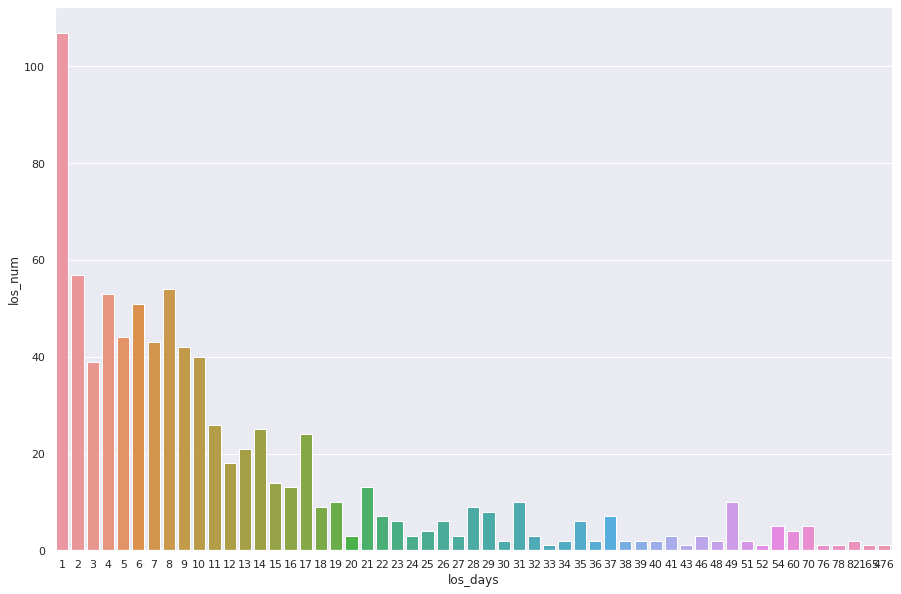

In [319]:
plt.figure(figsize=(15,10))
sns.barplot(data=pt_discharge_df_final,x='los_days', y='los_num')

### *Exploratory Data Analysis - Scatterplot*

In [320]:
import numpy
import matplotlib.pyplot as pl

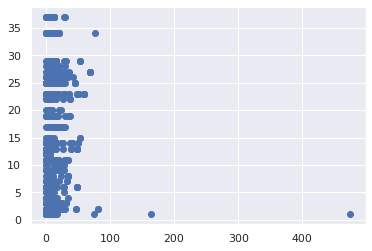

In [321]:
# LOS and Sum of cases
plt.scatter(ha_losnum, ha_cases)
plt.show()

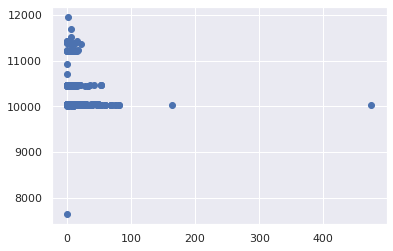

In [322]:
# LOS and Zip
plt.scatter(ha_losnum, ha_zip)
plt.show()

In [323]:
ha_df['los_num'].mean()

11.740696278511404

In [324]:
ha_df['los_num'].std()

21.45506233958279

In [325]:
ha_df['los_num'].max()

475.0

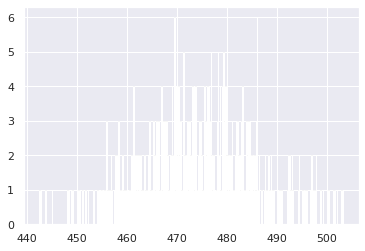

In [326]:
ha_losnum = numpy.random.normal(475.0, 11.74, 475)

plt.hist(ha_losnum, 500, color='black')
plt.show()

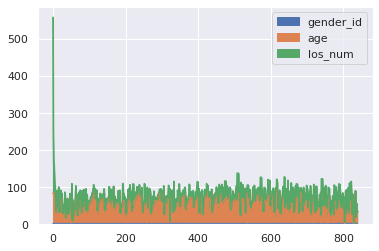

In [327]:
df = pd.DataFrame(ha_df, columns=['gender_id', 'age', 'los_num'])
df.plot.area()

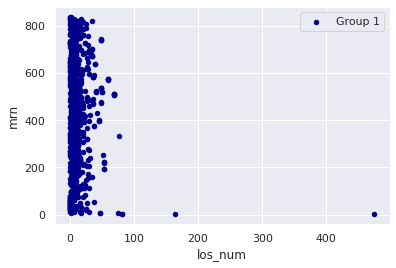

In [328]:
ha_df.plot.scatter(x='los_num', y='mrn', color='DarkBlue', label='Group 1')

In [329]:
df1 = ha_df.pivot_table(index='gender',values='visit_count',aggfunc='count')
df1

,visit_count
gender,
F,360
M,479


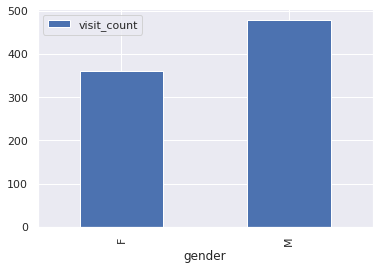

In [330]:
df1.plot(kind='bar')

In [331]:
df2 = ha_df.pivot_table(index='encounter_dept',values='visit_count',aggfunc='count')
df2

,visit_count
encounter_dept,
HA ED ADULT,634
HA ED PEDIATRIC,11
HA ED PSYCH,2
HA INTRA-OP,3
HA IP 11SU,24
HA IP 12MD,16
HA IP 13MD,46
HA IP 14MD,29
HA IP 15CC,5


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

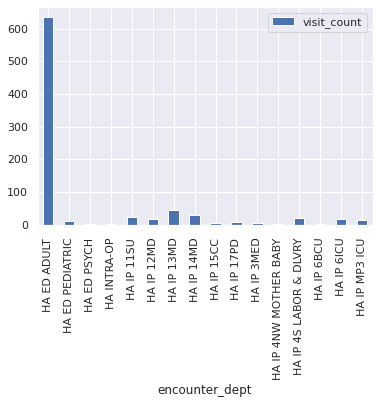

In [332]:
df2.plot(kind='bar')
plt.xticks(rotation=90)

In [333]:
df3 = ha_df.groupby('month_id')['value_id'].sum()
df3

month_id
1       2
2       2
3     263
4     435
5      73
6      36
7      15
8       3
11      1
12      1
Name: value_id, dtype: int64

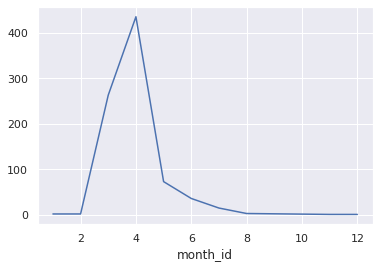

In [334]:
df3.plot(kind='line')
plt.show()

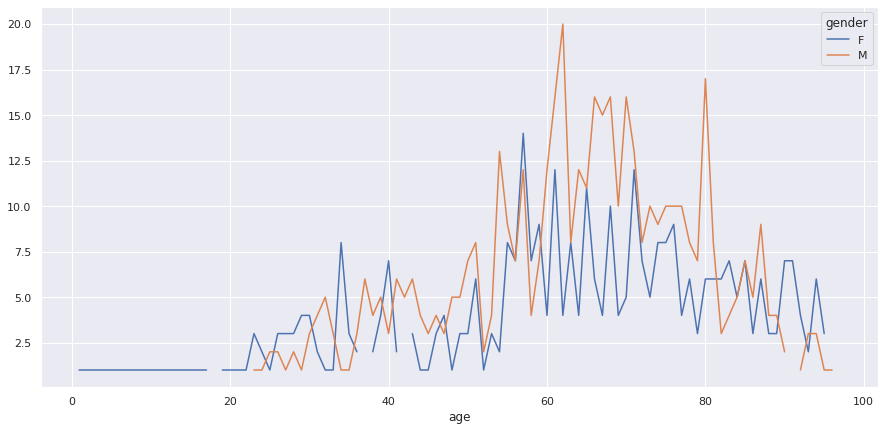

In [335]:
fig, ax = plt.subplots(figsize=(15,7))
ha_df.groupby(['age','gender']).count()['los_num'].unstack().plot(ax=ax)

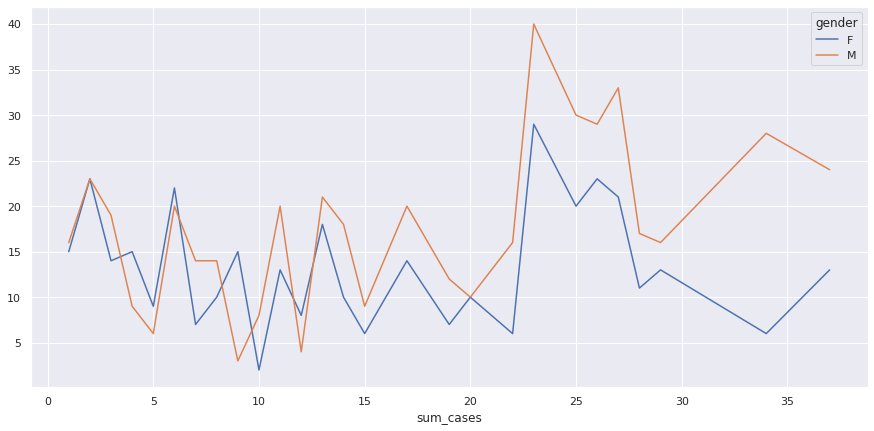

In [336]:
fig, ax = plt.subplots(figsize=(15,7))
ha_df.groupby(['sum_cases','gender']).count()['month'].unstack().plot(ax=ax)

In [337]:
import matplotlib.pyplot as plt
%matplotlib inline

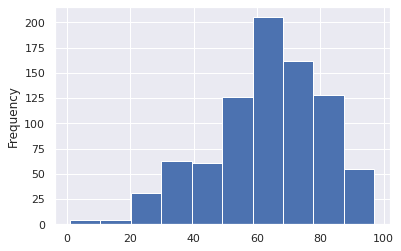

In [338]:
ha_df['age'].plot.hist()

In [339]:
correlations = ha_df.corr()
correlations = correlations['value_id']
print(correlations)

sum_cases            0.034164
visit_count               NaN
mrn                 -0.036207
age                  0.030056
gender_id           -0.010721
zip_code            -0.022851
admit_status_id     -0.058639
service_id           0.019667
month_id            -0.019012
year                -0.004550
los_num             -0.014394
dept_id             -0.021401
encounter_type_id   -0.001528
value_id             1.000000
Name: value_id, dtype: float64


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


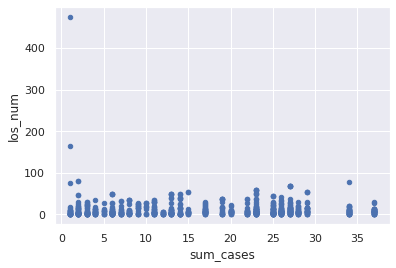

In [340]:
ha_df.plot.scatter(x='sum_cases', y='los_num')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


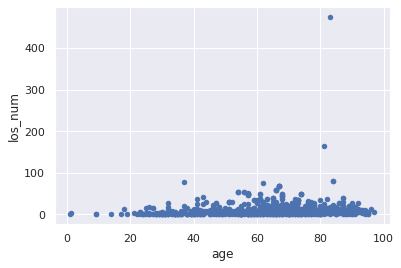

In [341]:
ha_df.plot.scatter(x='age', y='los_num')